In [1]:
import aocd
import re
from dotenv import load_dotenv
import numpy as np
from tqdm import tqdm
import networkx as nx

load_dotenv()

puzzle = aocd.get_puzzle(day=21, year=2024)
text = puzzle.input_data
examples = puzzle.examples
print(examples)

lines = text.splitlines()

example = examples[0].input_data.splitlines()

examples

[Example(input_data='+---+---+---+\n| 7 | 8 | 9 |\n+---+---+---+\n| 4 | 5 | 6 |\n+---+---+---+\n| 1 | 2 | 3 |\n+---+---+---+\n    | 0 | A |\n    +---+---+', answer_a='126384', answer_b=None, extra=None)]


[Example(input_data='+---+---+---+\n| 7 | 8 | 9 |\n+---+---+---+\n| 4 | 5 | 6 |\n+---+---+---+\n| 1 | 2 | 3 |\n+---+---+---+\n    | 0 | A |\n    +---+---+', answer_a='126384', answer_b=None, extra=None)]

In [5]:
text = """029A
980A
179A
456A
379A
"""
lines = text.splitlines()

text

'029A\n980A\n179A\n456A\n379A\n'

^ 2 KeysView(AtlasView({'A': {'val': '>'}, 'v': {'val': 'v'}}))
v 3 KeysView(AtlasView({'>': {'val': '>'}, '^': {'val': '^'}, '<': {'val': '<'}}))
< 1 KeysView(AtlasView({'v': {'val': '>'}}))
> 2 KeysView(AtlasView({'A': {'val': '^'}, 'v': {'val': '<'}}))
A 2 KeysView(AtlasView({'^': {'val': '<'}, '>': {'val': 'v'}}))


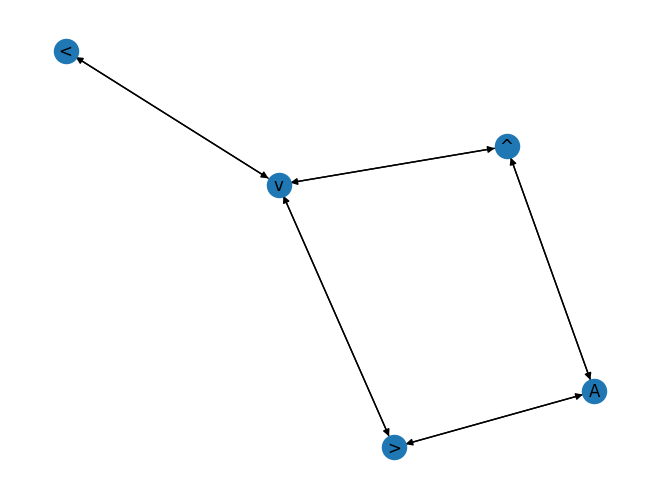

In [6]:
k1 = nx.DiGraph()

for i in list(range(10))+ ["A"]:
    k1.add_node(i)

k1.add_edge("A", 0, val="<")
k1.add_edge(0, "A", val=">")
k1.add_edge("A", 3, val="^")
k1.add_edge(3, "A", val="v")
k1.add_edge(0,2, val="^")
k1.add_edge(2,0, val="v")
k1.add_edge(2,3, val=">")
k1.add_edge(3,2, val="<")
k1.add_edge(2,1, val="<")
k1.add_edge(1,2, val=">")
k1.add_edge(2,5, val="^")
k1.add_edge(5,2, val="v")
k1.add_edge(3,6, val="^")
k1.add_edge(6,3, val="v")
k1.add_edge(6,5, val="<")
k1.add_edge(5,6, val=">")
k1.add_edge(5,4, val="<")
k1.add_edge(4,5, val=">")
k1.add_edge(5,8, val="^")
k1.add_edge(8,5, val="v")
k1.add_edge(1,4, val="^")
k1.add_edge(4,1, val="v")
k1.add_edge(4,7, val="^")
k1.add_edge(7,4, val="v")
k1.add_edge(7,8, val=">")
k1.add_edge(8,7, val="<")
k1.add_edge(8,9, val=">")
k1.add_edge(9,8, val="<")
k1.add_edge(9,6, val="v")
k1.add_edge(6,9, val="^")

k2 = nx.DiGraph()
k2.add_nodes_from(["^", "v", "<", ">", "A"])
k2.add_edge("A", "^", val="<")
k2.add_edge("^", "A", val=">")
k2.add_edge("A", ">", val="v")
k2.add_edge(">", "A", val="^")
k2.add_edge(">", "v", val="<")
k2.add_edge("v", ">", val=">")
k2.add_edge("v", "^", val="^")
k2.add_edge("^", "v", val="v")
k2.add_edge("v", "<", val="<")
k2.add_edge("<", "v", val=">")


for n in k2.nodes:
    print(n, len(k2[n].keys()), k2[n].keys())

nx.draw(k2, with_labels=True)

In [7]:
import re

from itertools import tee, product
def pairwise(it):
    a, b = tee(it)
    next(b, None)
    return zip(a, b)

def chain(a,b):
    for aa, bb in zip(a,b):
        yield aa
        yield bb

def f(s):
    if s in "A^v<>":
        return s
    return int(s)

def line2seqs(line, k):
    line = "A" + line.removeprefix("A")
    ret = []
    for a, b in pairwise(line):
        buffs = []
        paths = nx.all_shortest_paths(k, f(a), f(b))
        for path in paths:            
            buff = ""
            for e in pairwise(path):
                buff += k[e[0]][e[1]]["val"]
            buffs.append(buff)
        ret.append(buffs)   

    res = []
    for t in product(*ret):
        res.append("A".join(t)+"A")

    return res

def four_levels(line):
    l1s = line2seqs(line, k1)
    
    l2s = []
    for l1 in l1s:
        l2s += line2seqs(l1, k2)

    l3 = []
    for l2 in l2s:
        l3 += line2seqs(l2, k2)
    return min([len(l) for l in l3])
    

s = 0
for line in lines:
    # print(line, four_levels(line))
    numeric = int(re.sub(r"[A-Z]", "", line))
    length = four_levels(line)
    c = numeric * length
    s += c
    print(numeric, length, c)

print(s)

29 68 1972
980 60 58800
179 68 12172
456 64 29184
379 64 24256
126384


In [32]:
paths = list(nx.all_pairs_all_shortest_paths(k1))

paths

[(0,
  {0: [[0]],
   1: [[0, 2, 1]],
   2: [[0, 2]],
   3: [[0, 'A', 3], [0, 2, 3]],
   4: [[0, 2, 1, 4], [0, 2, 5, 4]],
   5: [[0, 2, 5]],
   6: [[0, 'A', 3, 6], [0, 2, 3, 6], [0, 2, 5, 6]],
   7: [[0, 2, 1, 4, 7], [0, 2, 5, 4, 7], [0, 2, 5, 8, 7]],
   8: [[0, 2, 5, 8]],
   9: [[0, 'A', 3, 6, 9], [0, 2, 3, 6, 9], [0, 2, 5, 6, 9], [0, 2, 5, 8, 9]],
   'A': [[0, 'A']]}),
 (1,
  {0: [[1, 2, 0]],
   1: [[1]],
   2: [[1, 2]],
   3: [[1, 2, 3]],
   4: [[1, 4]],
   5: [[1, 2, 5], [1, 4, 5]],
   6: [[1, 2, 3, 6], [1, 2, 5, 6], [1, 4, 5, 6]],
   7: [[1, 4, 7]],
   8: [[1, 2, 5, 8], [1, 4, 5, 8], [1, 4, 7, 8]],
   9: [[1, 2, 3, 6, 9],
    [1, 2, 5, 6, 9],
    [1, 4, 5, 6, 9],
    [1, 2, 5, 8, 9],
    [1, 4, 5, 8, 9],
    [1, 4, 7, 8, 9]],
   'A': [[1, 2, 0, 'A'], [1, 2, 3, 'A']]}),
 (2,
  {0: [[2, 0]],
   1: [[2, 1]],
   2: [[2]],
   3: [[2, 3]],
   4: [[2, 1, 4], [2, 5, 4]],
   5: [[2, 5]],
   6: [[2, 3, 6], [2, 5, 6]],
   7: [[2, 1, 4, 7], [2, 5, 4, 7], [2, 5, 8, 7]],
   8: [[2, 5, 8]],
   9:

In [22]:
line = lines[0]

line

l1s = line2seqs(line, k1)

l1s
for l1 in l1s:
    print(l1, len(l1))

# l1 = l1s[2]
# l1

# l2s = line2seqs(l1, k2)

# for l2 in l2s:
#     print(l2, len(l2))

<A^A>^^AvvvA 12
<A^A^>^AvvvA 12
<A^A^^>AvvvA 12


In [26]:
[(l, len(l)) for l in line2seqs(">^^", k2)], [(l, len(l)) for l in line2seqs("^>^", k2)] 

([('vA^<AA', 6), ('vA<^AA', 6)],
 [('<A>vA^<A', 8), ('<A>vA<^A', 8), ('<Av>A^<A', 8), ('<Av>A<^A', 8)])

In [35]:
aocd.submit(s, day=21, year=2024)

answer a: None
submitting for part a


That's the right answer!  You are one gold star closer to finding the Chief Historian. [Continue to Part Two]


Gtk-Message: 01:32:11.726: Not loading module "atk-bridge": The functionality is provided by GTK natively. Please try to not load it.


In [ ]:


paths = nx.all_simple_path(k2, "A", ">")
buffs = []
for path in paths:            
    buff = ""
    for e in pairwise(path):
        buff += k[e[0]][e[1]]["val"]
    buffs.append(buff)
